<a href="https://colab.research.google.com/github/guidosantillan01/pytorch-flower-classification/blob/master/Flower_classification_with_CNNs_with_transfer_learning_v6_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hyperparameters and Configuration

In [0]:
pretrained_model = 'densenet121'
version = 'v45'

conf_optimizer = 'Adam'
conf_lr = 0.001
conf_epochs = 20
unfreeze_lr = 0.00001
unfreeze_epochs = 30

num_workers = 4
batch_size = 18
filetype = '.pt'

filename = pretrained_model + '_' + 'batchsize' + str(batch_size) + '_' + 'optimizer' + conf_optimizer + '_' + 'lr' + str(conf_lr) + '_'  + 'epochs' + str(conf_epochs) + '_' + 'unfreezelr' + str(unfreeze_lr) + 'ep' + str(unfreeze_epochs) + '_' + version + filetype
print(filename)

densenet121_batchsize16_optimizerAdam_lr0.001_epochs20_unfreezelr1e-05ep30_v44.pt


In [0]:
normal_size = 224
normal_mean = [0.485, 0.456, 0.406]
normal_std = [0.229, 0.224, 0.225]

inc_size = 299
inc_mean = [0.5, 0.5, 0.5]
inc_std = [0.5, 0.5, 0.5]

## 0. Initial Setup

In [0]:
### Setup Google Colabs initial configuration and imports
!pip install Pillow==4.1.1
!pip install PIL
!pip install image

!pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.0-cp36-cp36m-linux_x86_64.whl
!pip3 install torchvision

!pip install pretrainedmodels 

    100% |████████████████████████████████| 5.7MB 6.7MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
    100% |████████████████████████████████| 484.0MB 50.9MB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5ca38000 @  0x7f53268152a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 2.1MB/s 
    100% |████████████████████████████████| 61kB 2.1MB/s 
  Running setup.py bdist_wheel for pretrainedmodels ... - \ done
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Runnin

In [0]:
### Setup imports
## Initial
import torch
import numpy as np
import os

## To load data
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

## To visualize  data
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import seaborn as sns

import pandas as pd

## To define the model
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F

## To specify the optimizer
import torch.optim as optim

## Others
import json
import time
import copy

## Cadene pretrained-models.pytorch library
import pretrainedmodels

In [0]:
### Test for CUDA
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available. Training on CPU ...')
else:
    print('CUDA is available. Training on GPU ...')
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

CUDA is available. Training on GPU ...


In [0]:
from collections import OrderedDict

### Initialize the CNN
def select_pretrained_model(pretrained_model):
    if pretrained_model == 'vgg16':
        model = models.vgg16(pretrained=True)
        
        for param in model.parameters():
            param.requires_grad = False
            
        classifier = nn.Sequential(OrderedDict([
                        ('fc1', nn.Linear(25088, 5000)),
                        ('relu', nn.ReLU()),
                        ('dropout', nn.Dropout(p=0.2)),
                        ('fc2', nn.Linear(5000, 102))
                    ]))
        
        model.classifier = classifier
        
        if conf_optimizer == 'Adam':
            optimizer = optim.Adam(model.classifier.parameters(), lr=conf_lr)
        if conf_optimizer == 'SGD':
            optimizer = optim.SGD(model.classifier.parameters(), lr=conf_lr, momentum=0.9)
        
        size = normal_size
        mean_array = normal_mean
        std_array = normal_std
        is_inception = False

        
        
        
    elif pretrained_model == 'resnet152':
        model = models.resnet152(pretrained=True)
        
        for param in model.parameters():
            param.requires_grad = False
            
#         fc = nn.Sequential(OrderedDict([
#                         ('fc1', nn.Linear(2048, 1024)),
#                         ('relu', nn.ReLU()),
#                         ('dropout', nn.Dropout(p=0.2)),
#                         ('fc2', nn.Linear(1024, 102))
#                     ]))
        fc = nn.Linear(2048, 102)
        model.fc = fc
        
        if conf_optimizer == 'Adam':
            optimizer = optim.Adam(model.fc.parameters(), lr=conf_lr)
        if conf_optimizer == 'SGD':
            optimizer = optim.SGD(model.fc.parameters(), lr=conf_lr, momentum=0.9)
        
        size = normal_size
        mean_array = normal_mean
        std_array = normal_std
        is_inception = False

        
        
        
        
    elif pretrained_model == 'resnet50':
        model = models.resnet50(pretrained=True)
        
        for param in model.parameters():
            param.requires_grad = False
            
#         fc = nn.Sequential(OrderedDict([
#                             ('fc1', nn.Linear(2048, 1024)),
#                             ('relu', nn.ReLU()),
#                             ('dropout', nn.Dropout(p=0.2)),
#                             ('fc2', nn.Linear(1024, 102))
#                         ]))
        fc = nn.Linear(2048, 102)
        model.fc = fc
        
        if conf_optimizer == 'Adam':
            optimizer = optim.Adam(model.fc.parameters(), lr=conf_lr)
        if conf_optimizer == 'SGD':
            optimizer = optim.SGD(model.fc.parameters(), lr=conf_lr, momentum=0.9)
        
        size = normal_size
        mean_array = normal_mean
        std_array = normal_std
        is_inception = False

        
        
        
    elif pretrained_model == 'densenet201':
        model = models.densenet201(pretrained=True)
        
        for param in model.parameters():
            param.requires_grad = False
        
#         classifier = nn.Sequential(OrderedDict([
#                             ('fc1', nn.Linear(1920, 960)),
#                             ('relu', nn.ReLU()),
#                             ('dropout', nn.Dropout(p=0.5)),
#                             ('fc2', nn.Linear(960, 102))
#                         ]))
        classifier = nn.Linear(1920, 102)
        model.classifier = classifier
        
        if conf_optimizer == 'Adam':
            optimizer = optim.Adam(model.classifier.parameters(), lr=conf_lr)
        if conf_optimizer == 'SGD':
            optimizer = optim.SGD(model.classifier.parameters(), lr=conf_lr, momentum=0.9)
        
        size = normal_size
        mean_array = normal_mean
        std_array = normal_std
        is_inception = False
            
            
            
            
    elif pretrained_model == 'densenet121':
        model = models.densenet121(pretrained=True)
        
        for param in model.parameters():
            param.requires_grad = False
            
#         classifier = nn.Sequential(OrderedDict([
#                             ('fc1', nn.Linear(1024, 512)),
#                             ('relu', nn.ReLU()),
#                             ('dropout', nn.Dropout(p=0.2)),
#                             ('fc2', nn.Linear(512, 102))
#                         ]))
        
        classifier = nn.Linear(1024, 102)
        model.classifier = classifier
        
        if conf_optimizer == 'Adam':
            optimizer = optim.Adam(model.classifier.parameters(), lr=conf_lr)
        if conf_optimizer == 'SGD':
            optimizer = optim.SGD(model.classifier.parameters(), lr=conf_lr, momentum=0.9)
        
        size = normal_size
        mean_array = normal_mean
        std_array = normal_std
        is_inception = False
        
        
        
        
    elif pretrained_model == 'inceptionv3':
        model = models.inception_v3(pretrained=True)

        for param in model.parameters():
            param.requires_grad = False
            
#         fc = nn.Sequential(OrderedDict([
#                     ('fc1', nn.Linear(2048, 1024)),
#                     ('relu', nn.ReLU()),
#                     ('dropout', nn.Dropout(p=0.2)),
#                     ('fc2', nn.Linear(1024, 102)),
#                 ]))
        
        fc = nn.Linear(2048, 102)
        model.fc = fc
        model.AuxLogits.fc = nn.Linear(768, 102)
        
        if conf_optimizer == 'Adam':
            optimizer = optim.Adam(model.fc.parameters(), lr=conf_lr)
        if conf_optimizer == 'SGD':
            optimizer = optim.SGD(model.fc.parameters(), lr=conf_lr, momentum=0.9)
        
        size = inc_size
        mean_array = inc_mean
        std_array = inc_std
        is_inception = True
        
        
        
        
    elif pretrained_model == 'inceptionresnetv2':
        model = pretrainedmodels.inceptionresnetv2(pretrained='imagenet')

        for param in model.parameters():
            param.requires_grad = False
            
#         last_linear = nn.Sequential(OrderedDict([
#                     ('fc1', nn.Linear(1536, 768)),
#                     ('relu', nn.ReLU()),
#                     ('dropout', nn.Dropout(p=0.2)),
#                     ('fc2', nn.Linear(768, 102)),
#                 ]))
        
        last_linear = nn.Linear(1536, 102)
        model.last_linear = last_linear
        
        if conf_optimizer == 'Adam':
            optimizer = optim.Adam(model.last_linear.parameters(), lr=conf_lr)
        if conf_optimizer == 'SGD':
            optimizer = optim.SGD(model.last_linear.parameters(), lr=conf_lr, momentum=0.9)
    
        size = inc_size
        mean_array = inc_mean
        std_array = inc_std
        is_inception = True
        
        
        
        
        
    elif pretrained_model == 'nasnetalarge':
        model = pretrainedmodels.nasnetalarge(pretrained='imagenet')

        for param in model.parameters():
            param.requires_grad = False
            
#         fc = nn.Sequential(OrderedDict([
#                     ('fc1', nn.Linear(1920, 960)),
#                     ('relu', nn.ReLU()),
#                     ('dropout', nn.Dropout(p=0.2)),
#                     ('fc2', nn.Linear(960, 102)),
#                 ]))
        
        last_linear = nn.Linear(1920, 102)
        model.last_linear = last_linear
        
        if conf_optimizer == 'Adam':
            optimizer = optim.Adam(model.last_linear.parameters(), lr=conf_lr)
        if conf_optimizer == 'SGD':
            optimizer = optim.SGD(model.last_linear.parameters(), lr=conf_lr, momentum=0.9)
    
        size = inc_size
        mean_array = inc_mean
        std_array = inc_std
        is_inception = True
        
        
        
        
        
    elif pretrained_model == 'inceptionv4':
        model = pretrainedmodels.inceptionv4(pretrained='imagenet')

        for param in model.parameters():
            param.requires_grad = False
            
#         last_linear = nn.Sequential(OrderedDict([
#                     ('fc1', nn.Linear(1536, 768)),
#                     ('relu', nn.ReLU()),
#                     ('dropout', nn.Dropout(p=0.2)),
#                     ('fc2', nn.Linear(768, 102)),
#                 ]))
        
        last_linear = nn.Linear(1536, 102)
        model.last_linear = last_linear
        
        if conf_optimizer == 'Adam':
            optimizer = optim.Adam(model.last_linear.parameters(), lr=conf_lr)
        if conf_optimizer == 'SGD':
            optimizer = optim.SGD(model.last_linear.parameters(), lr=conf_lr, momentum=0.9)

        size = inc_size
        mean_array = inc_mean
        std_array = inc_std
        is_inception = True
    
    
   

        
    else:
        print('NO PRE-TRAINED MODEL DEFINED')
        
    parameters = [size, mean_array, std_array, is_inception]
    
    return model, optimizer, parameters

In [0]:
model, optimizer, parameters = select_pretrained_model(pretrained_model)
size = parameters[0]
mean_array = parameters[1]
std_array = parameters[2]
is_inception = parameters[3]
# print(model)

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.torch/models/densenet121-a639ec97.pth
100%|██████████| 32342954/32342954 [00:00<00:00, 32570058.17it/s]


## 1. Load and Augment the Data

In [0]:
### Download flower dataset
!wget -cq https://github.com/udacity/pytorch_challenge/raw/master/cat_to_name.json
!wget -cq https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip
!rm -r flower_data || true
!unzip -qq flower_data.zip

rm: cannot remove 'flower_data': No such file or directory


In [0]:
### Data location
data_dir = 'flower_data'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'

dirs = {'train': train_dir,
        'valid': valid_dir}

In [0]:
### Normalize data
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(45),
        transforms.RandomResizedCrop(size),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean_array,
                             std=std_array)
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size + 32),
        transforms.CenterCrop(size),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean_array,
                             std=std_array)
    ]) 
}

### Load the training and test datasets
image_datasets = {x: datasets.ImageFolder(dirs[x], 
                                          transform=data_transforms[x]) 
                  for x in ['train', 'valid']}

### Prepare data loaders for each set of data
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x],
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=num_workers)
               for x in ['train', 'valid']}

### Datasets sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
print(dataset_sizes)

{'train': 6552, 'valid': 818}


In [0]:
### Label mapping
with open('cat_to_name.json', 'r') as f:
    label_map = json.load(f)

## 3. Define a model

In [0]:
### Move tensors to GPU if CUDA is available
model.to(device) 

### Specify loss function
criterion = nn.CrossEntropyLoss()

## 5. Train the model

In [0]:
def train_model(model, criterion, optimizer, num_epochs=20, is_inception=False):
    since = time.time()
    
    train_loss_history = []
    valid_loss_history = []
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(1, num_epochs+1):
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs, labels = inputs.to(device), labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    if is_inception and phase == 'train':
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        loss = loss1 + 0.4*loss2
                        
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                          
                    _, preds = torch.max(outputs, 1)
                    
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'valid':
                valid_loss_history.append(epoch_loss)
            if phase == 'train':
                train_loss_history.append(epoch_loss)

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best valid accuracy: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    history = pd.DataFrame(data={'train_loss': train_loss_history, 
                                 'valid_loss': valid_loss_history}, index=range(1, num_epochs+1))
    
    return model, history

In [0]:
model, history = train_model(model, criterion, optimizer, num_epochs=conf_epochs, is_inception=is_inception)

Epoch 1/20
----------
train Loss: 2.9718 Acc: 0.3832
valid Loss: 1.3490 Acc: 0.7396

Epoch 2/20
----------
train Loss: 1.5074 Acc: 0.6780
valid Loss: 0.7484 Acc: 0.8399

Epoch 3/20
----------
train Loss: 1.1306 Acc: 0.7466
valid Loss: 0.4887 Acc: 0.8961

Epoch 4/20
----------
train Loss: 0.9800 Acc: 0.7686
valid Loss: 0.4112 Acc: 0.9083

Epoch 5/20
----------
train Loss: 0.8572 Acc: 0.7894
valid Loss: 0.3656 Acc: 0.9095

Epoch 6/20
----------
train Loss: 0.8107 Acc: 0.7988
valid Loss: 0.3297 Acc: 0.9193

Epoch 7/20
----------
train Loss: 0.7383 Acc: 0.8172
valid Loss: 0.2993 Acc: 0.9315

Epoch 8/20
----------
train Loss: 0.7095 Acc: 0.8162
valid Loss: 0.3073 Acc: 0.9291

Epoch 9/20
----------
train Loss: 0.6646 Acc: 0.8318
valid Loss: 0.3118 Acc: 0.9181

Epoch 10/20
----------
train Loss: 0.6750 Acc: 0.8243
valid Loss: 0.2710 Acc: 0.9267

Epoch 11/20
----------
train Loss: 0.6409 Acc: 0.8306
valid Loss: 0.2677 Acc: 0.9254

Epoch 12/20
----------
train Loss: 0.6492 Acc: 0.8266
valid Los

In [0]:
# Plot here
def plot_losses(history, epochs):
    plt.title("Loss vs. Number of Training Epochs")
    plt.xlabel("Training Epochs")
    plt.ylabel("Loss function")

    plt.plot(history.index,history['train_loss'],label="Train loss")
    plt.plot(history.index,history['valid_loss'],label="Valid loss")

#     plt.ylim((0,1.))
    plt.xticks(np.arange(1, epochs+1, 1.0))
    plt.legend()
#     plt.margins(0)
    plt.show()

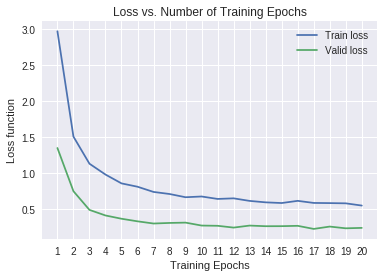

In [0]:
plot_losses(history, conf_epochs)

### Saving the checkpoint

In [0]:
## Save the checkpoint
## https://pytorch.org/tutorials/beginner/saving_loading_models.html
model.class_to_idx = image_datasets['train'].class_to_idx
model.cpu()
checkpoint = {
                'model_state_dict': model.state_dict(),
                'model_class_to_idx': model.class_to_idx,
             }
torch.save(checkpoint, filename)

### Loading the checkpoint

In [0]:
def load_model(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)

    model, optimizer, parameters = select_pretrained_model(pretrained_model)
            
    model.class_to_idx = checkpoint['model_class_to_idx']
    
    model.load_state_dict(checkpoint['model_state_dict'])
    
    return model


In [0]:
model = load_model(filename)

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


### Fine tuning unfreezed layers

In [0]:
model.to(device) 

for param in model.parameters():
    param.requires_grad = True
        
if conf_optimizer == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=unfreeze_lr)
if conf_optimizer == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=unfreeze_lr, momentum=0.9)

In [0]:
model, history_ft = train_model(model, criterion, optimizer, num_epochs=unfreeze_epochs, is_inception=is_inception)

Epoch 1/30
----------
train Loss: 0.4546 Acc: 0.8753
valid Loss: 0.1684 Acc: 0.9621

Epoch 2/30
----------
train Loss: 0.3586 Acc: 0.9005
valid Loss: 0.1541 Acc: 0.9633

Epoch 3/30
----------
train Loss: 0.3484 Acc: 0.9058
valid Loss: 0.1498 Acc: 0.9645

Epoch 4/30
----------
train Loss: 0.2995 Acc: 0.9214
valid Loss: 0.1365 Acc: 0.9719

Epoch 5/30
----------
train Loss: 0.2956 Acc: 0.9255
valid Loss: 0.1377 Acc: 0.9645

Epoch 6/30
----------
train Loss: 0.2732 Acc: 0.9272
valid Loss: 0.1330 Acc: 0.9682

Epoch 7/30
----------
train Loss: 0.2678 Acc: 0.9293
valid Loss: 0.1281 Acc: 0.9682

Epoch 8/30
----------
train Loss: 0.2626 Acc: 0.9289
valid Loss: 0.1172 Acc: 0.9743

Epoch 9/30
----------
train Loss: 0.2579 Acc: 0.9267
valid Loss: 0.1231 Acc: 0.9707

Epoch 10/30
----------
train Loss: 0.2239 Acc: 0.9394
valid Loss: 0.1181 Acc: 0.9731

Epoch 11/30
----------
train Loss: 0.2294 Acc: 0.9385
valid Loss: 0.1155 Acc: 0.9743

Epoch 12/30
----------
train Loss: 0.2305 Acc: 0.9397
valid Los

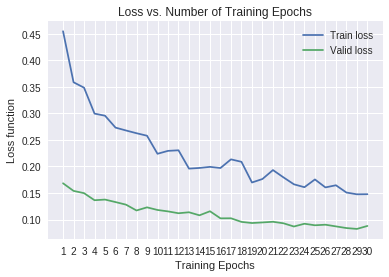

In [0]:
plot_losses(history_ft, unfreeze_epochs)

### Save the checkpoint

In [0]:
## Save the checkpoint
## https://pytorch.org/tutorials/beginner/saving_loading_models.html
model.class_to_idx = image_datasets['train'].class_to_idx
model.cpu()
checkpoint = {
                'model_state_dict': model.state_dict(),
                'model_class_to_idx': model.class_to_idx,
             }
torch.save(checkpoint, 'ft_' + filename)

### Train more epochs

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


Epoch 1/10
----------
train Loss: 0.1975 Acc: 0.9509
valid Loss: 0.0913 Acc: 0.9817

Epoch 2/10
----------
train Loss: 0.1650 Acc: 0.9576
valid Loss: 0.0947 Acc: 0.9841

Epoch 3/10
----------
train Loss: 0.1727 Acc: 0.9519
valid Loss: 0.0923 Acc: 0.9804

Epoch 4/10
----------
train Loss: 0.1832 Acc: 0.9486
valid Loss: 0.0967 Acc: 0.9829

Epoch 5/10
----------
train Loss: 0.1696 Acc: 0.9542
valid Loss: 0.0884 Acc: 0.9853

Epoch 6/10
----------
train Loss: 0.1772 Acc: 0.9541
valid Loss: 0.0941 Acc: 0.9804

Epoch 7/10
----------
train Loss: 0.1846 Acc: 0.9512
valid Loss: 0.0945 Acc: 0.9817

Epoch 8/10
----------
train Loss: 0.1714 Acc: 0.9524
valid Loss: 0.0944 Acc: 0.9841

Epoch 9/10
----------
train Loss: 0.1781 Acc: 0.9522
valid Loss: 0.0971 Acc: 0.9841

Epoch 10/10
----------
train Loss: 0.1837 Acc: 0.9492
valid Loss: 0.0931 Acc: 0.9829

Training complete in 31m 13s
Best valid accuracy: 0.985330


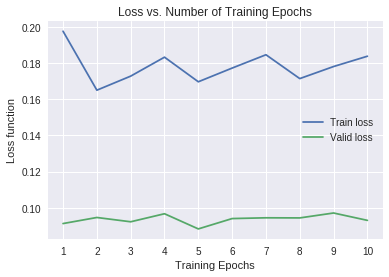

In [0]:
## Train more epochs
train_more = False

if train_more == True:
    model = load_model('ft_' + filename)
    model.to(device) 

    for param in model.parameters():
        param.requires_grad = True

    optimizer = optim.Adam(model.parameters(), lr=0.000001)
    add_epochs = 10

    model, history_ft = train_model(model, criterion, optimizer, num_epochs=add_epochs, is_inception=is_inception)
    
    plot_losses(history_ft, add_epochs)
    
    model.class_to_idx = image_datasets['train'].class_to_idx
    model.cpu()
    checkpoint = {
                    'model_state_dict': model.state_dict(),
                    'model_class_to_idx': model.class_to_idx,
                 }
    torch.save(checkpoint, 'ft_' + filename)

## 6. Inference for classification

In [0]:
model = load_model('ft_' + filename)

### Remember that you must call model.eval() to set dropout and batch 
### normalization layers to evaluation mode before running inference. 
### Failing to do this will yield inconsistent inference results.
model.eval()

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

### Image preprocessing

In [0]:
def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    img = Image.open(image_path)
    
    # Resize
    if img.size[0] > img.size[1]:
        img.thumbnail((10000, size+32))
    else:
        img.thumbnail((size+32, 10000))
        
    # Crop 
    left_margin = (img.width-size)/2
    bottom_margin = (img.height-size)/2
    right_margin = left_margin + size
    top_margin = bottom_margin + size
    
    img = img.crop((left_margin, 
                    bottom_margin, 
                    right_margin,   
                    top_margin))
    # Normalize
    img = np.array(img)/(size+31)
    mean = np.array(mean_array) #provided mean
    std = np.array(std_array) #provided std
    img = (img - mean)/std
    
    # Move color channels to first dimension as expected by PyTorch
    img = img.transpose((2, 0, 1))
    
    return img

In [0]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    if title:
        plt.title(title)
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array(mean_array)
    std = np.array(std_array)
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

### Class Prediction


In [0]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    # TODO: Implement the code to predict the class from an image file
        # Process image
    img = process_image(image_path)
    
    # Numpy -> Tensor
    image_tensor = torch.from_numpy(img).type(torch.FloatTensor)
    # Add batch of size 1 to image
    model_input = image_tensor.unsqueeze(0)
    
    # Probs
    model.cpu()
    probs = F.softmax(model(model_input), dim=1)
    
    # Top probs
    top_probs, top_labs = probs.topk(topk)
    top_probs = top_probs.detach().numpy().tolist()[0] 
    top_labs = top_labs.detach().numpy().tolist()[0]
        
    # Convert indices to classes
    idx_to_class = {val: key for key, val in model.class_to_idx.items()}
    top_labels = [idx_to_class[lab] for lab in top_labs]
    top_flowers = [label_map[idx_to_class[lab]] for lab in top_labs]
    return top_probs, top_labels, top_flowers

In [0]:
image_path = 'flower_data/valid/1/image_06739.jpg'

probs, classes, flowers = predict(image_path, model)
print(probs)
print(flowers)

[0.9966481924057007, 0.0014904154231771827, 0.000719247036613524, 0.0004318007850088179, 0.0002702554047573358]
['pink primrose', 'balloon flower', 'primula', "colt's foot", 'mallow']


### Sanity Check

In [0]:
### Display an image along with the top 5 classes
def plot_solution(image_path, model):
    # Set up plot
    plt.figure(figsize = (6,10))
    ax = plt.subplot(2,1,1)
#     ax.axis('off')
    
    # Set up title
    flower_num = image_path.split('/')[2]
    title_ = label_map[flower_num]
    
    # Plot flower
    img = process_image(image_path)
    imshow(img, ax, title = title_);
    
    # Make prediction
    probs, labs, flowers = predict(image_path, model) 
    print(probs)
    
    # Plot bar chart
    plt.subplot(2,1,2)
    sns.barplot(x=probs, y=flowers, color=sns.color_palette()[0]);
    plt.show()

[0.9966481924057007, 0.0014904154231771827, 0.000719247036613524, 0.0004318007850088179, 0.0002702554047573358]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


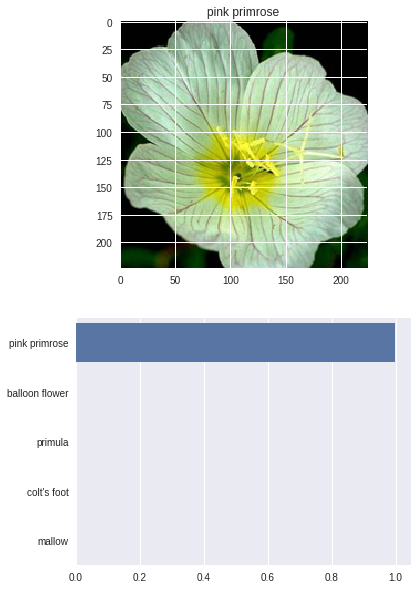

In [0]:
image_path = 'flower_data/valid/1/image_06739.jpg'
plot_solution(image_path, model)

[0.999946117401123, 3.1759540433995426e-05, 7.912052751635201e-06, 5.748384410253493e-06, 5.370310191210592e-06]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


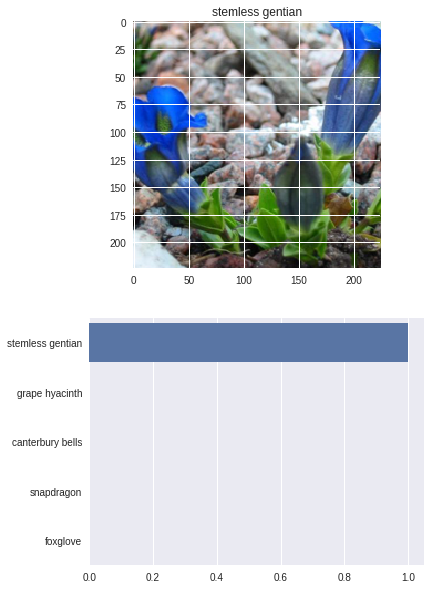

In [0]:
image_path = 'flower_data/valid/28/image_05257.jpg'
plot_solution(image_path, model)

[0.9744253158569336, 0.02057054080069065, 0.0014643801841884851, 0.0008784475503489375, 0.0006459555588662624]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


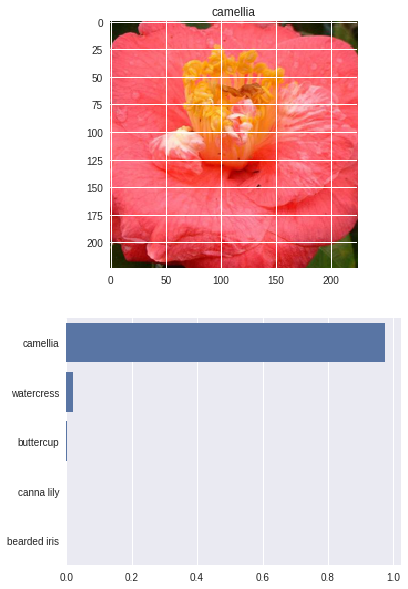

In [0]:
## Camellia
image_path = 'flower_data/valid/96/image_07605.jpg'
plot_solution(image_path, model)

[0.9103338718414307, 0.038256581872701645, 0.0317908450961113, 0.00535992719233036, 0.0044557699002325535]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


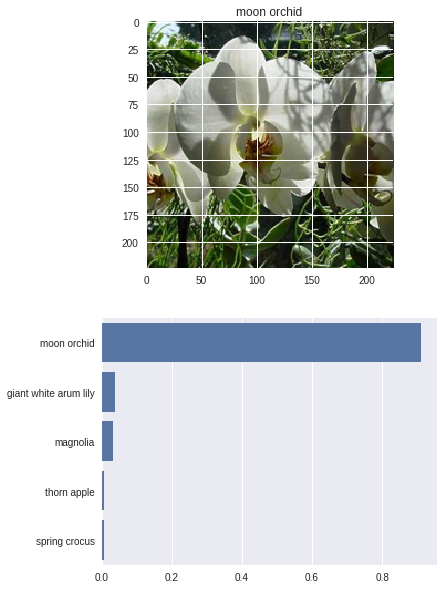

In [0]:
## Moon orchid
image_path = 'flower_data/valid/7/image_07216.jpg'
plot_solution(image_path, model)

[0.9377046823501587, 0.01651104725897312, 0.008232366293668747, 0.008223882876336575, 0.005975040141493082]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


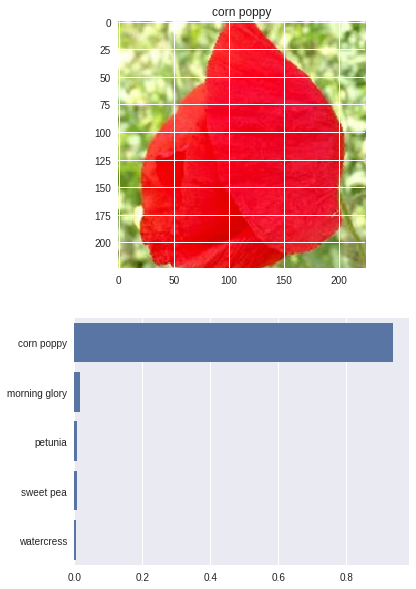

In [0]:
## Corn poppy
image_path = 'flower_data/valid/26/image_06506.jpg'
plot_solution(image_path, model)

[0.9089897274971008, 0.04603924602270126, 0.032094258815050125, 0.005526108201593161, 0.0018733820179477334]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


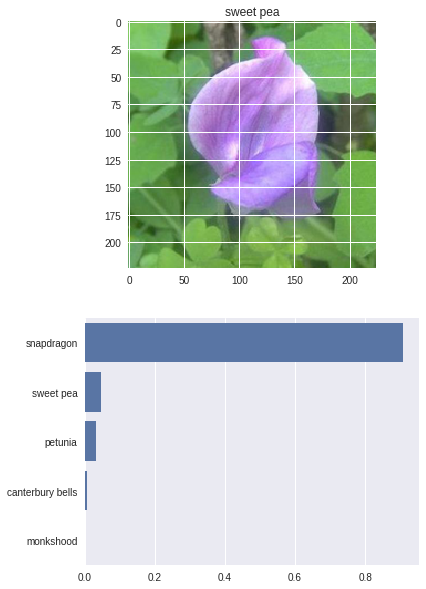

In [0]:
## Sweet pea
image_path = 'flower_data/valid/4/image_05660.jpg'
plot_solution(image_path, model)

[0.9999947547912598, 1.131243038798857e-06, 6.887007657496724e-07, 6.836085049144458e-07, 5.804499210171343e-07]


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


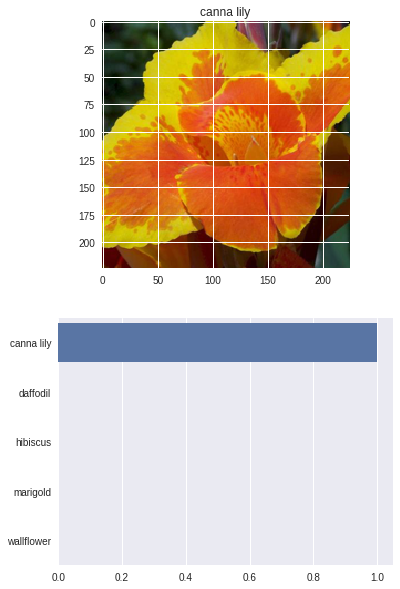

In [0]:
## Canna lily
image_path = 'flower_data/valid/90/image_04402.jpg'
plot_solution(image_path, model)